In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
from scipy.interpolate import interp1d 
import fitsio
import sys
sys.path.append('../')
sys.path.append('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_working/')
from su_utils import read_cov, imshowplot
import scipy
#sys.path.append('../cosmolike_planck_working/')

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

%load_ext autoreload
%autoreload 2

#HF = lambda Nr,Nbin: (Nr-Nbin-2.) *1./(Nr-1.)

In [3]:
def chisquare(data1, data2, cov, ind = 0):
    diff = (data1 - data2)[ind:]
    F = np.linalg.inv(cov[ind:, ind:])
    chi2 = np.dot(diff, np.dot(F, diff))*1./diff.size
    return chi2

In [15]:

Nthetabin = 10

cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_sgc_veto_10bins_NG_llll_cov_Ntheta10_Ntomo4_1'
#cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_cmass_sgc_veto_10bins_NG'
cov_an_cmass_only_NG = read_cov( covfilename=cov_an_cmass_filename, G=False )[-10:, -10:]
cov_an_cmass_G = read_cov( covfilename=cov_an_cmass_filename, NG=False )[-10:, -10:]
cov_an_cmass_NG = cov_an_cmass_G + cov_an_cmass_only_NG

#cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_cmass_sgc_10bins'
#cov_an_cmass = read_cov( covfilename=cov_an_cmass_filename )[-10:, -10:]


cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_cmass_sgc_veto_10bins_only_shotnoise'
cov_an_cmass_shotnoise = read_cov( covfilename=cov_an_cmass_filename )[-Nthetabin:, -Nthetabin:]


cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_ngc_veto_10bins_NG_llll_cov_Ntheta10_Ntomo4_1'
#cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_cmass_sgc_veto_10bins_NG'
cov_an_cmass_ngc_only_NG = read_cov( covfilename=cov_an_cmass_filename, G=False )[-10:, -10:]
cov_an_cmass_ngc_G = read_cov( covfilename=cov_an_cmass_filename, NG=False )[-10:, -10:]
cov_an_cmass_ngc_NG = cov_an_cmass_ngc_G + cov_an_cmass_ngc_only_NG

#cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_cmass_sgc_10bins_veto'
#cov_an_cmass_veto = read_cov( covfilename=cov_an_cmass_filename )[-Nthetabin:, -Nthetabin:]


cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_sgc_veto_20bins_NG_2_llll_cov_Ntheta20_Ntomo4_1'
#cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_cmass_sgc_veto_10bins_NG'
cov_an_cmass_20bins_only_NG = read_cov( covfilename=cov_an_cmass_filename, G=False )[-20:, -20:]
cov_an_cmass_20ins_G = read_cov( covfilename=cov_an_cmass_filename, NG=False )[-20:, -20:]
cov_an_cmass_20bins_NG = cov_an_cmass_20ins_G + cov_an_cmass_20bins_only_NG


cov_an_cmass_ngc_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_ngc_veto_20bins_NG_llll_cov_Ntheta20_Ntomo4_1'
#cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_cmass_sgc_veto_10bins_NG'
cov_an_cmass_ngc_20bins_only_NG = read_cov( covfilename=cov_an_cmass_ngc_filename, G=False )[-20:, -20:]
cov_an_cmass_ngc_20bins_G = read_cov( covfilename=cov_an_cmass_ngc_filename, NG=False )[-20:, -20:]
cov_an_cmass_ngc_20bins_NG = cov_an_cmass_ngc_20bins_G + cov_an_cmass_ngc_20bins_only_NG


cov_an_dmass_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_dmass/cov_mcal4_dmass_pcut_no_veto_10bins_NG_llll_cov_Ntheta10_Ntomo4_1'
#cov_an_dmass_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_dmass/cov_mcal4_dmass_pcut_sysweight_10bins_NG_llll_cov_Ntheta10_Ntomo4_1'
#cov_an_dmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_dmass_pcut_sysweight_10bins_NG'
cov_an_dmass_G = read_cov( covfilename=cov_an_dmass_filename, NG = False )[-Nthetabin:, -Nthetabin:]
cov_an_dmass_only_NG = read_cov( covfilename=cov_an_dmass_filename, G=False )[-Nthetabin:, -Nthetabin:]
cov_an_dmass_NG = cov_an_dmass_G + cov_an_dmass_only_NG


cov_an_dmass_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_dmass/cov_mcal4_dmass_pcut_sysweight_20bins_NG_2_llll_cov_Ntheta20_Ntomo4_1'
#cov_an_dmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_dmass_pcut_sysweight_10bins_NG'
cov_an_dmass_20bins_G = read_cov( covfilename=cov_an_dmass_filename, NG = False )[-20:, -20:]
cov_an_dmass_20bins_only_NG = read_cov( covfilename=cov_an_dmass_filename, G=False )[-20:, -20:]
cov_an_dmass_20bins_NG = cov_an_dmass_20bins_G + cov_an_dmass_20bins_only_NG



### Compare origina theory line and cosmosis theory line

In [5]:
theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)



In [6]:
ls /n/des/lee.5922/programs/cosmolike/cosmosis/output/datav_wgtheta_datav_DofS_covanalytic_DS_nz/data_vector/

2pt_angle.txt  2pt_covariance.txt          2pt_simulation.txt
2pt_bin1.txt   2pt_data.txt                2pt_theory.txt
2pt_bin2.txt   2pt_inverse_covariance.txt  values.txt


In [7]:
# callig cosmosis theory line

sis_dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/output/'
xi_sgc_sis = np.genfromtxt(sis_dir + 'datav_cmass_sgc_theory/galaxy_xi_dmass/bin_1_1.txt')
xi_ngc_sis = np.genfromtxt(sis_dir + 'datav_cmass_ngc_theory/galaxy_xi_dmass/bin_1_1.txt')
xi_full_sis = np.genfromtxt(sis_dir + 'datav_cmass_full_theory/galaxy_xi_dmass/bin_1_1.txt')
theta_sis = np.genfromtxt(sis_dir + 'datav_cmass_sgc_theory/galaxy_xi_dmass/theta.txt')
theta_sis = theta_sis * 180/np.pi

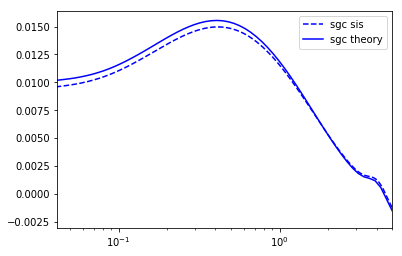

In [23]:
fig, ax = plt.subplots()
ax.plot(theta_sis, theta_sis*xi_sgc_sis, 'b--', label='sgc sis')
#ax.plot(theta_sis, theta_sis*xi_full_sis, 'k--', label='full sis')
#ax.plot(theta_sis, theta_sis*xi_ngc_sis, 'r--', label='ngc sis')
ax.plot(theta_th, theta_th*theory_sgc, 'b-', label='sgc theory')
#ax.plot(theta_th, theta_th*theory, 'r-', label = 'ngc theory')
ax.set_xlim(2.5/60, 300/60.)
ax.set_xscale('log')

ax.legend()

### Mock covariance versus Analytic covariace matrix diagonal tests

In [ ]:
# calling mocks

In [8]:
#cov_mocks = np.genfromtxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_S_QPM_760.cov')
cov_mocks = np.genfromtxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_S_QPM_550_binslop05.cov')

sigma_xi_sgc = np.sqrt(cov_mocks.diagonal()) 
cov_mocks_ngc = np.genfromtxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_N_QPM_1000.cov')
sigma_xi_ngc = np.sqrt(cov_mocks_ngc.diagonal()) 

#cov_rescaled_mocks = np.genfromtxt('../data_txt/cmass/cov_rescaled_mocks_NG.txt')
cov_rescaled_mocks = np.genfromtxt('../data_txt/cmass/cov_dmass_no_veto_rescaled_mocks_NG.txt')
sigma_xi_dmass = np.sqrt(cov_rescaled_mocks.diagonal()) 
print cov_rescaled_mocks.shape

(10, 10)


In [21]:
#meanr_sgc, xi_sgc, _ = np.loadtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.txt',unpack=True)
cmass_sgc_data = np.genfromtxt('../data_txt/cmass/npairs_cmass_sgc_bins10_binslop_05.txt')
_, meanr_sgc, _, xi_sgc, _, DD_sgc, RR_sgc, DR_sgc, npairs_sgc = [cmass_sgc_data[:,i] for i in range(9)]
cov_cmass_s = cov_mocks.copy() #cov_an_cmass.copy()
xi_err_sgc = np.sqrt(cov_cmass_s.diagonal())


cmass_sgc_data_20bins = np.genfromtxt('../data_txt/cmass/npairs_DR12v5_CMASS_South_20bins_binslop_05.txt')
_, meanr_sgc_20bins, _, xi_sgc_20bins, _, _, _, _, _ = [cmass_sgc_data_20bins[:,i] for i in range(9)]
#cov_cmass_s_20bins = cov_mocks.copy() #cov_an_cmass.copy()
xi_err_sgc_20bins = np.sqrt(cov_an_cmass_20bins_NG.diagonal())


cmass_ngc_data1 = np.genfromtxt('../data_txt/cmass/npairs_cmass_ngc_bins10_binslop_05.txt')
_, meanr_ngc, _, xi_ngc, sigma_xi_ngc1, DD_ngc, RR_ngc, DR_ngc, npairs_ngc = [cmass_ngc_data1[:,i] for i in range(9)]
#meanr_ngc, xi_ngc, _ = np.loadtxt('../data_txt//acf_auto_cmass_ngc_sys_cp_nz_weight_nbin10_jk100.txt',unpack=True)
cov_cmass_n = cov_mocks_ngc.copy() #np.genfromtxt('../data_txt//acf_auto_cmass_ngc_sys_cp_nz_weight_nbin10_jk100.cov')* 1./HFactor
xi_err_ngc = np.sqrt(cov_cmass_n.diagonal())



cmass_ngc_data_20bins = np.genfromtxt('../data_txt/cmass/npairs_DR12v5_CMASS_North_20bins_binslop_05.txt')
_, meanr_ngc_20bins, _, xi_ngc_20bins, _, _, _, _, _ = [cmass_ngc_data_20bins[:,i] for i in range(9)]
#cov_cmass_s_20bins = cov_mocks.copy() #cov_an_cmass.copy()
xi_err_ngc_20bins = np.sqrt(cov_an_cmass_ngc_20bins_NG.diagonal())


DD_full = DD_sgc + DD_ngc
DR_full = DR_sgc + DR_ngc
RR_full = RR_sgc + RR_ngc

meanr_full = meanr_ngc.copy()
xi_full = (DD_full - 2*DR_full + RR_full)*1./RR_full
cov_cmass_full = np.linalg.inv(np.linalg.inv( cov_cmass_s ) + np.linalg.inv( cov_cmass_s ))
xi_err_full = np.sqrt(cov_cmass_full.diagonal())

#dmass_data = np.genfromtxt('../data_txt/cmass/npairs_dmass_pcut_sysweight_bins10_binslop_05.txt')
#dmass_data = np.genfromtxt('../data_txt/cmass/npairs_dmass_pcut_veto_no_sysweight_10bins_binslop_05.txt')
dmass_data = np.genfromtxt('../data_txt/cmass/npairs_dmass_pcut_no_veto_10bins_binslop_05_no2.txt')
#dmass_data = np.genfromtxt('../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_poisson_DMASS_pcut_NOWEIGHT_10bins.npairs')
#cat ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_poisson_DMASS_pcut_NOWEIGHT_10bins.npairs
_, meanr_dmass, _, xi_dmass, _, _, _, _, _ = [dmass_data[:,i] for i in range(9)]
cov_dmass = cov_rescaled_mocks.copy() #cov_an_dmass.copy()
xi_err_dmass = np.sqrt(cov_dmass.diagonal())

dmass_data_20bins = np.genfromtxt('../data_txt/cmass/npairs_dmass_pcut_sysweight_20bins_binslop_05.txt')
_, meanr_dmass_20bins, _, xi_dmass_20bins, _, _, _, _, _ = [dmass_data_20bins[:,i] for i in range(9)]
xi_err_dmass_20bins = np.sqrt(cov_an_dmass_20bins_NG.diagonal())


In [11]:
#theta_sgc, xi_mocks_sgc = np.genfromtxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_S_QPM_760.wtheta', unpack=True)

theta_sgc, xi_mocks_sgc = np.genfromtxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_S_QPM_550_binslop05.wtheta', unpack=True)
#_, theta_sgc, _, xi_mocks_sgc, sigma_xi_mocks_sgc, _, _, _, _ = \
#np.genfromtxt('../data_txt/cmass/SGC_binslop05//acf_auto_poisson_mock_galaxy_DR12_CMASS_S_QPM_0252.rdzw.npairs', unpack=True)

#theta_sgc, xi_mocks_sgc, _ = \
#np.genfromtxt('../data_txt/cmass/bin_slop_05/acf_auto_poisson_mock_galaxy_DR12_CMASS_S_QPM_0003.rdzw.txt', unpack=True)

#theta_sgc, xi_mocks_sgc, _ = np.genfromtxt('../data_txt/cmass/SGC_binslop05//acf_auto_poisson_mock_galaxy_DR12_CMASS_S_QPM_0252.rdzw.txt', unpack=True)
theta_ngc, xi_mocks_ngc = np.genfromtxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_N_QPM_1000.wtheta', unpack=True)

In [12]:
#theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
#theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)

theory_sgc_interp = scipy.interpolate.interp1d(theta_th, theory_sgc)
theory_sgc_interp = theory_sgc_interp(theta_sgc)

theory_ngc_interp = scipy.interpolate.interp1d(theta_th, theory)
theory_ngc_interp = theory_ngc_interp(theta_ngc)

In [13]:
# sis theory interp 
sis_sgc_interp = scipy.interpolate.interp1d(theta_sis, xi_sgc_sis)
sis_sgc_interp = sis_sgc_interp(theta_sgc)

sis_full_interp = scipy.interpolate.interp1d(theta_sis, xi_full_sis)
sis_full_interp = sis_full_interp(theta_sgc)

sis_ngc_interp = scipy.interpolate.interp1d(theta_sis, xi_ngc_sis)
sis_ngc_interp = sis_ngc_interp(theta_ngc)

sis_sgc_20bins_interp = scipy.interpolate.interp1d(theta_sis, xi_sgc_sis)
sis_sgc_20bins_interp = sis_sgc_20bins_interp(meanr_sgc_20bins)

sis_ngc_20bins_interp = scipy.interpolate.interp1d(theta_sis, xi_ngc_sis)
sis_ngc_20bins_interp = sis_ngc_20bins_interp(meanr_ngc_20bins)

sgc data-sis cov_an 36.03337830391805
ngc data-sis cov_an 125.14049449701712
dmass data - sgc data cov_an 8.773362818726081
dmass data - ngc data cov_an 10.408596611216991
sgc data - ngc data cov_an 37.11035625787608


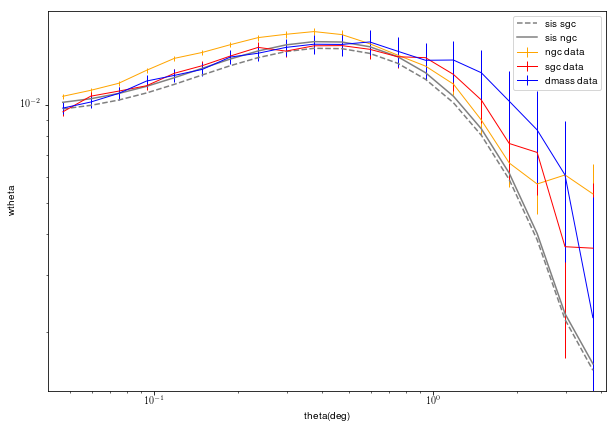

In [44]:
#fig, (ax, ax2) = plt.subplots(2, 1, figsize = (10, 7), gridspec_kw = {'height_ratios':[3, 1]})
fig, ax = plt.subplots(1, 1, figsize = (10,7))

ax.plot( meanr_sgc_20bins, meanr_sgc_20bins*sis_sgc_20bins_interp, color = 'grey', ls='--', label='sis sgc')
ax.plot( meanr_ngc_20bins, meanr_ngc_20bins*sis_ngc_20bins_interp, color = 'grey', ls='-', label='sis ngc')

ax.errorbar(meanr_ngc_20bins, meanr_ngc_20bins*xi_ngc_20bins, yerr = meanr_ngc_20bins* xi_err_ngc_20bins, color = 'orange', lw = 1, label='ngc data')
ax.errorbar(meanr_sgc_20bins, meanr_sgc_20bins*xi_sgc_20bins, yerr = meanr_sgc_20bins* xi_err_sgc_20bins, color = 'red', lw = 1, label='sgc data')
ax.errorbar(meanr_dmass_20bins, meanr_dmass_20bins*xi_dmass_20bins, yerr = meanr_dmass_20bins* xi_err_dmass_20bins, color = 'blue', lw = 1, label='dmass data')

#ax.errorbar(theta_mean2, theta_mean2*xi_dmass2, yerr = theta_mean2*sigma_dmass_mock, color = 'black', lw = 1, label='dmass new')

ax.set_xlim(2.5/60., 250/60.)
#ax.set_ylim(0, 0.3)

ax.set_xlabel('theta(deg)')
ax.set_ylabel('wtheta')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

#ax2.plot(theta_sgc, (xi_mocks_sgc - sis_sgc_interp) / sis_sgc_interp, 'b-' )
#ax2.axhline(y=0, color='grey', ls='--')
#ax2.set_xscale('log')
#ax2.set_ylabel('frac diff')
#fig.subplots_adjust(hspace=0.0);

#chi_ngc = np.dot( (xi_mocks_ngc - theory_ngc_interp), np.dot(np.linalg.inv(cov_mocks_ngc),(xi_mocks_ngc - theory_ngc_interp) ))
#chi_sgc_sis = np.dot( (xi_mocks_sgc - sis_sgc_interp), np.dot(np.linalg.inv(cov_mocks),(xi_mocks_sgc - sis_sgc_interp)  ))
chi_sgc_theory = np.dot( (xi_sgc_20bins - sis_sgc_20bins_interp), np.dot(np.linalg.inv(cov_an_cmass_20bins_NG),(xi_sgc_20bins - sis_sgc_20bins_interp)  ))
chi_ngc_theory = np.dot( (xi_ngc_20bins - sis_ngc_20bins_interp), np.dot(np.linalg.inv(cov_an_cmass_ngc_20bins_NG),(xi_ngc_20bins - sis_ngc_20bins_interp)  ))

chi_sgc_dmass_data = np.dot( (xi_dmass_20bins - sis_sgc_20bins_interp), np.dot(np.linalg.inv(cov_an_cmass_20bins_NG + cov_an_dmass_20bins_NG),(xi_dmass_20bins - sis_sgc_20bins_interp)  ))
chi_ngc_dmass_data = np.dot( (xi_dmass_20bins - sis_ngc_20bins_interp), np.dot(np.linalg.inv(cov_an_cmass_ngc_20bins_NG + cov_an_dmass_20bins_NG),(xi_dmass_20bins - sis_ngc_20bins_interp)  ))
chi_ngc_sgc_data = np.dot( (xi_sgc_20bins - xi_ngc_20bins), np.dot(np.linalg.inv(cov_an_cmass_ngc_20bins_NG + cov_an_cmass_20bins_NG),(xi_sgc_20bins - xi_ngc_20bins)  ))



#print 'ngc', chi_ngc
print 'sgc data-sis cov_an', chi_sgc_theory
print 'ngc data-sis cov_an', chi_ngc_theory
print 'dmass data - sgc data cov_an', chi_sgc_dmass_data
print 'dmass data - ngc data cov_an', chi_ngc_dmass_data
print 'sgc data - ngc data cov_an', chi_ngc_sgc_data

#print 'sgc the', chi_sgc_theory



mock-sis sgc sis 23.908241773149975


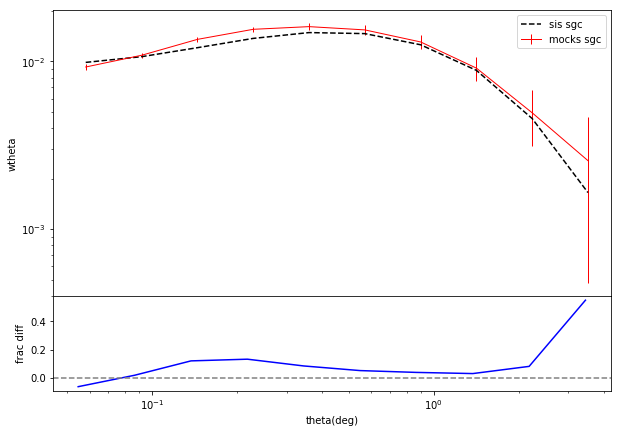

In [125]:
#theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)


fig, (ax, ax2) = plt.subplots(2, 1, figsize = (10, 7), gridspec_kw = {'height_ratios':[3, 1]})

#ax.plot( theta_th, theory, color = 'grey', ls='-', label='theory ngc')
#ax.plot( theta_th, theta_th*theory_sgc, color = 'grey', ls='--', label='theory sgc')
ax.plot( theta_sgc, theta_sgc*sis_sgc_interp, color = 'k', ls='--', label='sis sgc')

#ax.errorbar( meanr_sgc, xi_sgc, yerr = xi_err_sgc, color = 'k', label='measurement sgc')
#ax.errorbar( meanr_ngc, xi_ngc, yerr = xi_err_sgc, color = 'k', label='measurement ngc')
#ax.errorbar(theta_ngc, xi_mocks_ngc, yerr = sigma_xi_ngc, color = 'blue', lw = 1, label='mocks ngc')
ax.errorbar(theta_sgc, theta_sgc*xi_mocks_sgc, yerr = theta_sgc*sigma_xi_sgc, color = 'red', lw = 1, label='mocks sgc')
#ax.errorbar(theta_mean2, theta_mean2*xi_dmass2, yerr = theta_mean2*sigma_dmass_mock, color = 'black', lw = 1, label='dmass new')

ax.set_xlim(2.5/60., 250/60.)
#ax.set_ylim(0, 0.3)

ax2.set_xlabel('theta(deg)')
ax.set_ylabel('wtheta')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

#ax2.plot(theta_ngc, (xi_mocks_ngc - theory_ngc_interp) / theory_ngc_interp, 'b-' )
#ax2.plot(theta_sgc, (xi_mocks_sgc - theory_sgc_interp) / theory_sgc_interp, 'r-' )
ax2.plot(theta_sgc, (xi_mocks_sgc - sis_sgc_interp) / sis_sgc_interp, 'b-' )
ax2.axhline(y=0, color='grey', ls='--')
ax2.set_xscale('log')
ax2.set_ylabel('frac diff')
fig.subplots_adjust(hspace=0.0);

#chi_ngc = np.dot( (xi_mocks_ngc - theory_ngc_interp), np.dot(np.linalg.inv(cov_mocks_ngc),(xi_mocks_ngc - theory_ngc_interp) ))
chi_sgc_sis = np.dot( (xi_mocks_sgc - sis_sgc_interp), np.dot(np.linalg.inv(cov_mocks),(xi_mocks_sgc - sis_sgc_interp)  ))
#chi_sgc_theory = np.dot( (xi_mocks_sgc - theory_sgc_interp), np.dot(np.linalg.inv(cov_mocks),(xi_mocks_sgc - theory_sgc_interp)  ))
#print 'ngc', chi_ngc
print 'mock-sis sgc sis', chi_sgc_sis
#print 'sgc the', chi_sgc_theory


mock-sis ngc 56.805032896941555
mock-sis sgc 23.908241773149975
mock-sis ngc, an cov 64.3777094370724
mock-sis sgc, an cov 56.710584027482625


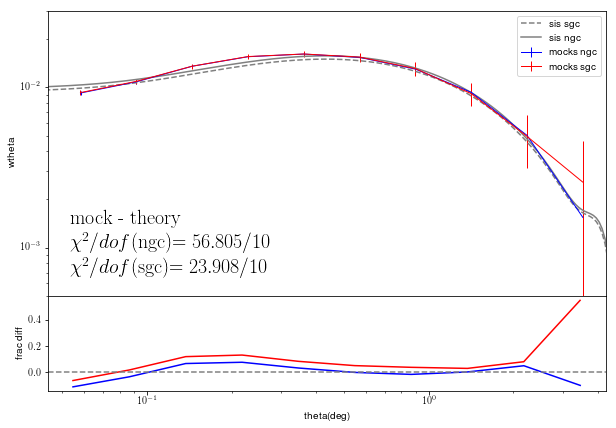

In [43]:
#theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)


fig, (ax, ax2) = plt.subplots(2, 1, figsize = (10, 7), gridspec_kw = {'height_ratios':[3, 1]})


ax.plot( theta_sis, theta_sis*xi_sgc_sis, color = 'grey', ls='--', label='sis sgc')
ax.plot( theta_sis, theta_sis*xi_ngc_sis, color = 'grey', ls='-', label='sis ngc')


#ax.plot( theta_th, theory, color = 'grey', ls='-', label='theory ngc')
#ax.plot( theta_th, theory_sgc, color = 'grey', ls='--', label='theory sgc')

#ax.errorbar( meanr_sgc, xi_sgc, yerr = xi_err_sgc, color = 'k', label='measurement sgc')
#ax.errorbar( meanr_ngc, xi_ngc, yerr = xi_err_sgc, color = 'k', label='measurement ngc')
ax.errorbar(theta_ngc, theta_ngc*xi_mocks_ngc, yerr = theta_ngc*sigma_xi_ngc, color = 'blue', lw = 1, label='mocks ngc')
ax.errorbar(theta_sgc, theta_ngc*xi_mocks_sgc, yerr = theta_ngc*sigma_xi_sgc, color = 'red', lw = 1, label='mocks sgc')
#ax.errorbar(theta_mean2, theta_mean2*xi_dmass2, yerr = theta_mean2*sigma_dmass_mock, color = 'black', lw = 1, label='dmass new')

ax.set_xlim(2.5/60., 250/60.)
#ax.set_ylim(0, 0.3)

ax2.set_xlabel('theta(deg)')
ax.set_ylabel('wtheta')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

ax.set_ylim(5e-04, 0.03)


chi_ngc = np.dot( (xi_mocks_ngc - sis_ngc_interp), np.dot(np.linalg.inv(cov_mocks_ngc),(xi_mocks_ngc - sis_ngc_interp).T ))
chi_sgc = np.dot( (xi_mocks_sgc - sis_sgc_interp), np.dot(np.linalg.inv(cov_mocks),(xi_mocks_sgc - sis_sgc_interp).T  ))
print 'mock-sis ngc', chi_ngc
print 'mock-sis sgc', chi_sgc


chi_ngc_an = np.dot( (xi_mocks_ngc - sis_ngc_interp), np.dot(np.linalg.inv(cov_an_cmass_NG),(xi_mocks_ngc - sis_ngc_interp).T ))
chi_sgc_an = np.dot( (xi_mocks_sgc - sis_sgc_interp), np.dot(np.linalg.inv(cov_an_cmass_NG),(xi_mocks_sgc - sis_sgc_interp).T  ))
print 'mock-sis ngc, an cov', chi_ngc_an
print 'mock-sis sgc, an cov', chi_sgc_an


ax.text(0.05, 0.0014, r'{\rm mock - theory}', fontsize = 20) 
ax.text(0.05, 0.001, r'$\chi^2/dof {\rm (ngc)}$'+r'$= {:0.3f}/10$'.format(chi_ngc), fontsize = 20)
ax.text(0.05, 0.0007, r'$\chi^2/dof {\rm (sgc)}$'+r'$= {:0.3f}/10$'.format(chi_sgc), fontsize = 20)


ax2.plot(theta_ngc, (xi_mocks_ngc - sis_ngc_interp) / sis_ngc_interp, 'b-' )
ax2.plot(theta_sgc, (xi_mocks_sgc - sis_sgc_interp) / sis_sgc_interp, 'r-' )
ax2.axhline(y=0, color='grey', ls='--')
ax2.set_xscale('log')
ax2.set_ylabel('frac diff')
fig.subplots_adjust(hspace=0.0);



data-mock ngc 85.9227338876065
data-mock sgc 21.470107745590035
data-theory ngc 57.54190887387042
data-theory sgc 11.808102260305738


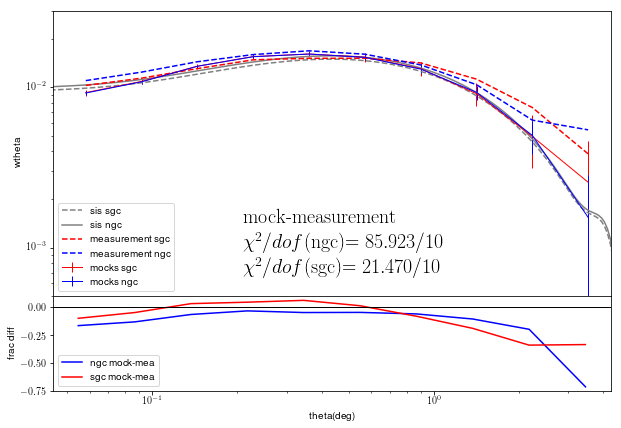

In [298]:
#theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)


fig, (ax, ax2) = plt.subplots(2, 1, figsize = (10, 7), gridspec_kw = {'height_ratios':[3, 1]})

ax.plot( theta_sis, theta_sis*xi_sgc_sis, color = 'grey', ls='--', label='sis sgc')
ax.plot( theta_sis, theta_sis*xi_ngc_sis, color = 'grey', ls='-', label='sis ngc')

ax.plot( meanr_sgc, meanr_sgc*xi_sgc,  ls='--', color = 'red', label='measurement sgc')
ax.plot( meanr_ngc, meanr_ngc*xi_ngc,  color = 'blue', ls='--', label='measurement ngc')
ax.errorbar(theta_sgc, theta_sgc*xi_mocks_sgc, yerr = theta_sgc*sigma_xi_sgc, color = 'red', lw = 1, label='mocks sgc')
ax.errorbar(theta_ngc, theta_ngc*xi_mocks_ngc, yerr = theta_ngc*sigma_xi_ngc, color = 'blue', lw = 1, label='mocks ngc')
#ax.errorbar(theta_mean2, theta_mean2*xi_dmass2, yerr = theta_mean2*sigma_dmass_mock, color = 'black', lw = 1, label='dmass new')

ax.set_xlim(2.5/60., 250/60.)
#ax.set_ylim(0, 0.3)

ax2.set_xlabel('theta(deg)')
ax.set_ylabel('wtheta')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='best')
ax.set_ylim(5e-04, 0.03)

chi_ngc = np.dot( (xi_mocks_ngc - xi_ngc), np.dot(np.linalg.inv(cov_mocks_ngc),(xi_mocks_ngc - xi_ngc) ))
chi_sgc = np.dot( (xi_mocks_sgc - xi_sgc), np.dot(np.linalg.inv(cov_mocks),(xi_mocks_sgc - xi_sgc)  ))
print 'data-mock ngc', chi_ngc
print 'data-mock sgc', chi_sgc
ax.text(0.2, 0.0014, r'{\rm mock-measurement}', fontsize=20)
ax.text(0.2, 0.001, r'$\chi^2/dof {\rm (ngc)}$'+r'$= {:0.3f}/10$'.format(chi_ngc), fontsize = 20)
ax.text(0.2, 0.0007, r'$\chi^2/dof {\rm (sgc)}$'+r'$= {:0.3f}/10$'.format(chi_sgc), fontsize = 20)



chi_ngc_theory = np.dot( (sis_ngc_interp - xi_ngc), np.dot(np.linalg.inv(cov_mocks_ngc),(sis_ngc_interp - xi_ngc) ))
chi_sgc_theory = np.dot( (sis_sgc_interp - xi_sgc), np.dot(np.linalg.inv(cov_mocks),(sis_sgc_interp - xi_sgc)  ))
print 'data-theory ngc', chi_ngc_theory
print 'data-theory sgc', chi_sgc_theory


ax2.plot(theta_ngc, (xi_mocks_ngc - xi_ngc) / xi_ngc, 'b-', label='ngc mock-mea' )
ax2.plot(theta_sgc, (xi_mocks_sgc - xi_sgc) / xi_sgc, 'r-', label='sgc mock-mea' )
ax2.axhline(y=0, color='k', ls='-', lw=1)
ax2.set_xscale('log')
ax2.set_ylabel('frac diff')
ax2.legend()
fig.subplots_adjust(hspace=0.0);



data-mock 2.1470107745590035
data-theory 1.1808102260305737
mock-theory 2.3908241773149976
data-theory an 2.274097320644416


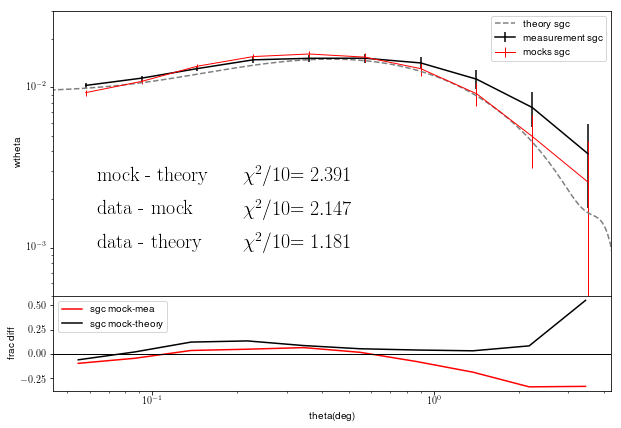

In [46]:
#theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)


fig, (ax, ax2) = plt.subplots(2, 1, figsize = (10, 7), gridspec_kw = {'height_ratios':[3, 1]})

ax.plot( theta_sis, theta_sis*xi_sgc_sis, color = 'grey', ls='--', label='theory sgc')
ax.errorbar( meanr_sgc, meanr_sgc*xi_sgc,  yerr = meanr_sgc*sigma_xi_sgc, ls='-', color = 'k', label='measurement sgc')
ax.errorbar(theta_sgc, theta_sgc*xi_mocks_sgc, yerr = theta_sgc*sigma_xi_sgc, color = 'red', lw = 1, label='mocks sgc')
#ax.errorbar(theta_ngc, theta_ngc*xi_mocks_ngc, yerr = theta_ngc*sigma_xi_ngc, color = 'blue', lw = 1, label='mocks ngc')
#ax.errorbar(theta_mean2, theta_mean2*xi_dmass2, yerr = theta_mean2*sigma_dmass_mock, color = 'black', lw = 1, label='dmass new')

ax.set_xlim(2.5/60., 250/60.)
#ax.set_ylim(0, 0.3)

ax2.set_xlabel('theta(deg)')
ax.set_ylabel('wtheta')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='best')
ax.set_ylim(5e-04, 0.03)



#chi_sgc_mock_theory = np.dot( (sis_sgc_interp - xi_mocks_sgc), np.dot(np.linalg.inv( cov_mocks ),(sis_sgc_interp - xi_mocks_sgc) ))
chi_sgc_mock_theory = chisquare(sis_sgc_interp, xi_mocks_sgc, cov_mocks)
ax.text(0.06, 0.0026, r'{\rm mock - theory}', fontsize=20)
ax.text(0.2, 0.0026, r'$\chi^2/10 $'+r'$= {:0.3f}$'.format(chi_sgc_mock_theory), fontsize = 20)


#chi_dmass = np.dot( (xi_mocks_ngc - xi_ngc), np.dot(np.linalg.inv(cov_mocks_ngc)/np.sqrt(2),(xi_mocks_ngc - xi_ngc) ))
#chi_sgc = np.dot( (xi_mocks_sgc - xi_sgc), np.dot(np.linalg.inv(cov_mocks),(xi_mocks_sgc - xi_sgc).T  ))
chi_sgc = chisquare(xi_mocks_sgc, xi_sgc, cov_mocks)

#print 'data-mock ngc', chi_ngc
print 'data-mock', chi_sgc
ax.text(0.06, 0.0016, r'{\rm data - mock}', fontsize=20)
ax.text(0.2, 0.0016, r'$\chi^2/10$'+r'$= {:0.3f}$'.format(chi_sgc), fontsize = 20)
#ax.text(0.2, 0.0007, r'$\chi^2/dof {\rm (sgc)}$'+r'$= {:0.3f}/10$'.format(chi_sgc), fontsize = 20)


#chi_sgc_dmass_data = np.dot( (xi_sgc - xi_dmass), np.dot(np.linalg.inv(cov_mocks + cov_rescaled_mocks),(xi_sgc - xi_dmass).T  ))
#print 'data-mock ngc', chi_ngc
#print 'data-data sgc dmass', chi_sgc_dmass_data


#chi_sgc_theory = np.dot( (sis_sgc_interp - xi_sgc), np.dot(np.linalg.inv( cov_mocks ),(sis_sgc_interp - xi_sgc) ))
#chi_sgc_theory_an = np.dot( (sis_sgc_interp - xi_sgc), np.dot(np.linalg.inv( cov_an_cmass_NG ),(sis_sgc_interp - xi_sgc) ))
chi_sgc_theory = chisquare(sis_sgc_interp, xi_sgc, cov_mocks)
chi_sgc_theory_an = chisquare(sis_sgc_interp, xi_sgc, cov_an_cmass_NG)

#chi_sgc_theory = np.dot( (sis_sgc_interp - xi_sgc), np.dot(np.linalg.inv(cov_mocks)/np.sqrt(2),(sis_sgc_interp - xi_sgc)  ))
print 'data-theory', chi_sgc_theory
print 'mock-theory', chi_sgc_mock_theory

print 'data-theory an', chi_sgc_theory_an
#print 'data-theory sgc', chi_sgc_theory
ax.text(0.06, 0.001, r'{\rm data - theory}', fontsize=20)
ax.text(0.2, 0.001, r'$\chi^2/10 $'+r'$= {:0.3f}$'.format(chi_sgc_theory), fontsize = 20)





#ax2.plot(theta_sgc, (xi_ - sis_sgc_interp) / sis_sgc_interp, 'b-', label='mock-theory' )
ax2.plot(theta_sgc, (xi_mocks_sgc - xi_sgc) / xi_sgc, 'r-', label='sgc mock-mea' )
ax2.plot(theta_sgc, (xi_mocks_sgc - sis_sgc_interp) / sis_sgc_interp, 'k-', label='sgc mock-theory' )
ax2.axhline(y=0, color='k', ls='-', lw=1)
ax2.set_xscale('log')
ax2.set_ylabel('frac diff')
ax2.legend()
fig.subplots_adjust(hspace=0.0);






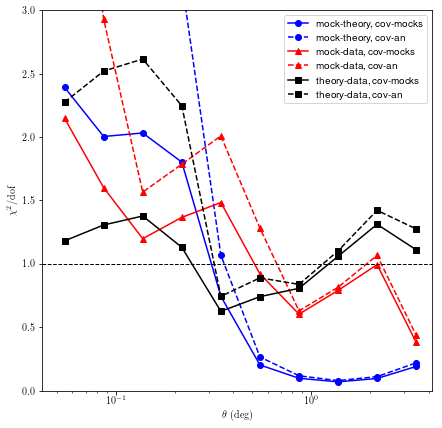

In [39]:
fig, ax = plt.subplots(figsize=(7,7))

chi_sgc_mock_theory_list = np.zeros(theta_sgc.size)
chi_sgc_mock_theory_an_list = np.zeros(theta_sgc.size)
chi_sgc_mock_data_list = np.zeros(theta_sgc.size)
chi_sgc_mock_data_an_list = np.zeros(theta_sgc.size)
chi_sgc_theory_data_list = np.zeros(theta_sgc.size)
chi_sgc_theory_data_an_list = np.zeros(theta_sgc.size)

for ind in range(0, 10):
    #chi_sgc_mock_theory = chisquare(sis_sgc_interp, xi_mocks_sgc, cov_mocks, ind = ind)
    
    chi_sgc_mock_theory_list[ind] = chisquare(xi_mocks_sgc, sis_sgc_interp, cov_mocks, ind = ind)
    chi_sgc_mock_theory_an_list[ind] = chisquare(xi_mocks_sgc, sis_sgc_interp, cov_an_cmass_NG, ind = ind)
    chi_sgc_mock_data_list[ind] = chisquare(xi_mocks_sgc, xi_sgc, cov_mocks, ind = ind)
    chi_sgc_mock_data_an_list[ind] = chisquare(xi_mocks_sgc, xi_sgc, cov_an_cmass_NG, ind = ind)
    chi_sgc_theory_data_list[ind] = chisquare(sis_sgc_interp, xi_sgc, cov_mocks, ind = ind)
    chi_sgc_theory_data_an_list[ind] = chisquare(sis_sgc_interp, xi_sgc, cov_an_cmass_NG, ind = ind)
    
#ax.plot(theta_sgc[ind], chi_sgc_mock_theory, 'bo', label='mock-theory')
ax.plot(theta_sgc, chi_sgc_mock_theory_list, 'bo-', label='mock-theory, cov-mocks')
ax.plot(theta_sgc, chi_sgc_mock_theory_an_list, 'bo--', label='mock-theory, cov-an')
ax.plot(theta_sgc, chi_sgc_mock_data_list, 'r^-', label='mock-data, cov-mocks')
ax.plot(theta_sgc, chi_sgc_mock_data_an_list, 'r^--', label='mock-data, cov-an')
ax.plot(theta_sgc, chi_sgc_theory_data_list, 'ks-', label='theory-data, cov-mocks')
ax.plot(theta_sgc, chi_sgc_theory_data_an_list, 'ks--', label='theory-data, cov-an')
    
ax.set_xscale('log')
ax.set_xlim(2.5/60, 250/60.)
ax.axhline(y = 1.0, ls='--', color='k', lw=1)

ax.legend(loc='best')
ax.set_ylim(0, 3)

ax.set_xlabel('$\\theta$ {\\rm (deg)}')
ax.set_ylabel(r'$\chi^2/{\rm dof}$')

data-mock 85.9227338876065
data-theory 57.54190887387042
mock-theory 56.805032896941555
data-theory an 120.4465186491652


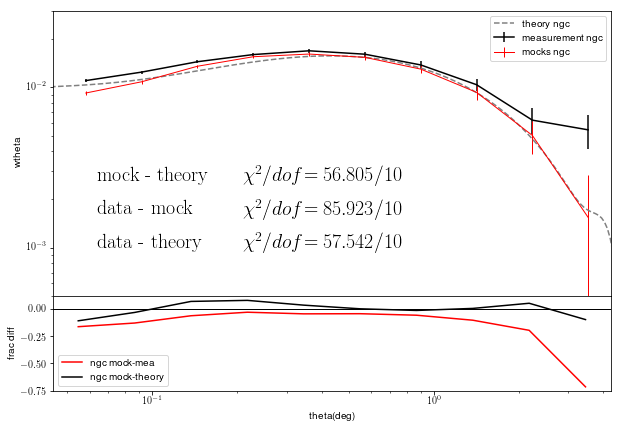

In [296]:
#theta_th, theory_ngc = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)


fig, (ax, ax2) = plt.subplots(2, 1, figsize = (10, 7), gridspec_kw = {'height_ratios':[3, 1]})

ax.plot( theta_sis, theta_sis*xi_ngc_sis, color = 'grey', ls='--', label='theory ngc')
ax.errorbar( meanr_ngc, meanr_ngc*xi_ngc,  yerr = meanr_ngc*sigma_xi_ngc, ls='-', color = 'k', label='measurement ngc')
ax.errorbar(theta_ngc, theta_ngc*xi_mocks_ngc, yerr = theta_ngc*sigma_xi_ngc, color = 'red', lw = 1, label='mocks ngc')
#ax.errorbar(theta_ngc, theta_ngc*xi_mocks_ngc, yerr = theta_ngc*sigma_xi_ngc, color = 'blue', lw = 1, label='mocks ngc')
#ax.errorbar(theta_mean2, theta_mean2*xi_dmass2, yerr = theta_mean2*sigma_dmass_mock, color = 'black', lw = 1, label='dmass new')

ax.set_xlim(2.5/60., 250/60.)
#ax.set_ylim(0, 0.3)

ax2.set_xlabel('theta(deg)')
ax.set_ylabel('wtheta')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='best')
ax.set_ylim(5e-04, 0.03)



chi_ngc_mock_theory = np.dot( (sis_ngc_interp - xi_mocks_ngc), np.dot(np.linalg.inv( cov_mocks_ngc ),(sis_ngc_interp - xi_mocks_ngc) ))

ax.text(0.06, 0.0026, r'{\rm mock - theory}', fontsize=20)
ax.text(0.2, 0.0026, r'$\chi^2/dof $'+r'$= {:0.3f}/10$'.format(chi_ngc_mock_theory), fontsize = 20)


#chi_dmass = np.dot( (xi_mocks_ngc - xi_ngc), np.dot(np.linalg.inv(cov_mocks_ngc)/np.sqrt(2),(xi_mocks_ngc - xi_ngc) ))
chi_ngc = np.dot( (xi_mocks_ngc - xi_ngc), np.dot(np.linalg.inv(cov_mocks_ngc),(xi_mocks_ngc - xi_ngc).T  ))
#print 'data-mock ngc', chi_ngc
print 'data-mock', chi_ngc
ax.text(0.06, 0.0016, r'{\rm data - mock}', fontsize=20)
ax.text(0.2, 0.0016, r'$\chi^2/dof$'+r'$= {:0.3f}/10$'.format(chi_ngc), fontsize = 20)
#ax.text(0.2, 0.0007, r'$\chi^2/dof {\rm (ngc)}$'+r'$= {:0.3f}/10$'.format(chi_ngc), fontsize = 20)


#chi_ngc_dmass_data = np.dot( (xi_ngc - xi_dmass), np.dot(np.linalg.inv(cov_mocks + cov_rescaled_mocks),(xi_ngc - xi_dmass).T  ))
#print 'data-mock ngc', chi_ngc
#print 'data-data ngc dmass', chi_ngc_dmass_data


chi_ngc_theory = np.dot( (sis_ngc_interp - xi_ngc), np.dot(np.linalg.inv( cov_mocks_ngc ),(sis_ngc_interp - xi_ngc) ))
chi_ngc_theory_an = np.dot( (sis_ngc_interp - xi_ngc), np.dot(np.linalg.inv( cov_an_cmass_ngc_NG ),(sis_ngc_interp - xi_ngc) ))
#chi_ngc_theory = np.dot( (sis_ngc_interp - xi_ngc), np.dot(np.linalg.inv(cov_mocks)/np.sqrt(2),(sis_ngc_interp - xi_ngc)  ))
print 'data-theory', chi_ngc_theory
print 'mock-theory', chi_ngc_mock_theory

print 'data-theory an', chi_ngc_theory_an
#print 'data-theory ngc', chi_ngc_theory
ax.text(0.06, 0.001, r'{\rm data - theory}', fontsize=20)
ax.text(0.2, 0.001, r'$\chi^2/dof $'+r'$= {:0.3f}/10$'.format(chi_ngc_theory), fontsize = 20)





#ax2.plot(theta_ngc, (xi_ - sis_ngc_interp) / sis_ngc_interp, 'b-', label='mock-theory' )
ax2.plot(theta_ngc, (xi_mocks_ngc - xi_ngc) / xi_ngc, 'r-', label='ngc mock-mea' )
ax2.plot(theta_ngc, (xi_mocks_ngc - sis_ngc_interp) / sis_ngc_interp, 'k-', label='ngc mock-theory' )
ax2.axhline(y=0, color='k', ls='-', lw=1)
ax2.set_xscale('log')
ax2.set_ylabel('frac diff')
ax2.legend()
fig.subplots_adjust(hspace=0.0);






data-mock sgc dmass 2.0612969147199633
data-data sgc dmass 0.48108386361886224
data-theory dmass 1.380114577194852
data-theory dmass an 1.941155966888023


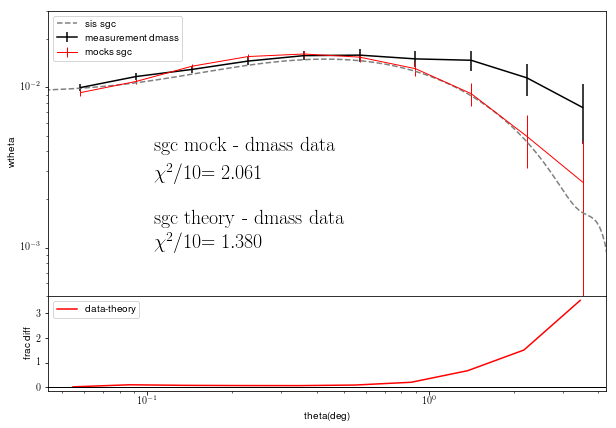

In [23]:
#theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)

chi_sgc_dmass = chisquare(xi_mocks_sgc, xi_dmass, cov_rescaled_mocks)
chi_sgc_dmass_data = chisquare(xi_sgc, xi_dmass, cov_mocks + cov_rescaled_mocks)
chi_dmass_theory = chisquare(sis_sgc_interp, xi_dmass, cov_rescaled_mocks)
chi_dmass_theory_an = chisquare(sis_sgc_interp, xi_dmass, cov_an_dmass_NG)





fig, (ax, ax2) = plt.subplots(2, 1, figsize = (10, 7), gridspec_kw = {'height_ratios':[3, 1]})


ax.plot( theta_sis, theta_sis*xi_sgc_sis, color = 'grey', ls='--', label='sis sgc')
ax.errorbar( meanr_dmass, meanr_dmass*xi_dmass,  yerr = meanr_dmass*sigma_xi_dmass, ls='-', color = 'k', label='measurement dmass')

ax.errorbar(theta_sgc, theta_sgc*xi_mocks_sgc, yerr = theta_sgc*sigma_xi_sgc, color = 'red', lw = 1, label='mocks sgc')
#ax.errorbar(theta_ngc, theta_ngc*xi_mocks_ngc, yerr = theta_ngc*sigma_xi_ngc, color = 'blue', lw = 1, label='mocks ngc')
#ax.errorbar(theta_mean2, theta_mean2*xi_dmass2, yerr = theta_mean2*sigma_dmass_mock, color = 'black', lw = 1, label='dmass new')

ax.set_xlim(2.5/60., 250/60.)
#ax.set_ylim(0, 0.3)

ax2.set_xlabel('theta(deg)')
ax.set_ylabel('wtheta')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='best')
ax.set_ylim(5e-04, 0.03)

#chi_dmass = np.dot( (xi_mocks_ngc - xi_ngc), np.dot(np.linalg.inv(cov_mocks_ngc)/np.sqrt(2),(xi_mocks_ngc - xi_ngc) ))
#print 'data-mock ngc', chi_ngc
print 'data-mock sgc dmass', chi_sgc_dmass
ax.text(0.1, 0.004, r'{\rm sgc mock - dmass data}', fontsize=20)
ax.text(0.1, 0.0027, r'$\chi^2/10$'+r'$= {:0.3f}$'.format(chi_sgc_dmass), fontsize = 20)
#ax.text(0.2, 0.0007, r'$\chi^2/dof {\rm (sgc)}$'+r'$= {:0.3f}/10$'.format(chi_sgc), fontsize = 20)


#chi_sgc_dmass_data = np.dot( (xi_sgc - xi_dmass), np.dot(np.linalg.inv(cov_mocks + cov_rescaled_mocks),(xi_sgc - xi_dmass).T  ))
#print 'data-mock ngc', chi_ngc
print 'data-data sgc dmass', chi_sgc_dmass_data


#chi_sgc_theory = np.dot( (sis_sgc_interp - xi_sgc), np.dot(np.linalg.inv(cov_mocks)/np.sqrt(2),(sis_sgc_interp - xi_sgc)  ))
print 'data-theory dmass', chi_dmass_theory
print 'data-theory dmass an', chi_dmass_theory_an
#print 'data-theory sgc', chi_sgc_theory
ax.text(0.1, 0.0014, r'{\rm sgc theory - dmass data}', fontsize=20)
ax.text(0.1, 0.001, r'$\chi^2/10 $'+r'$= {:0.3f}$'.format(chi_dmass_theory), fontsize = 20)


ax2.plot(theta_sgc, (xi_dmass - sis_sgc_interp) / sis_sgc_interp, 'r-', label='data-theory' )
#ax2.plot(theta_sgc, (xi_mocks_sgc - xi_sgc) / xi_sgc, 'r-', label='sgc mock-mea' )
ax2.axhline(y=0, color='k', ls='-', lw=1)
ax2.set_xscale('log')
ax2.set_ylabel('frac diff')
ax2.legend()
fig.subplots_adjust(hspace=0.0);




0.7486238759650127
0.7325618766787791
0.7387066667368664
0.8242758033152684
0.6956322256510797
0.8129022358491934
0.9796521046470079
0.8433097106519579
0.9980961665232546
1.2198402314293877


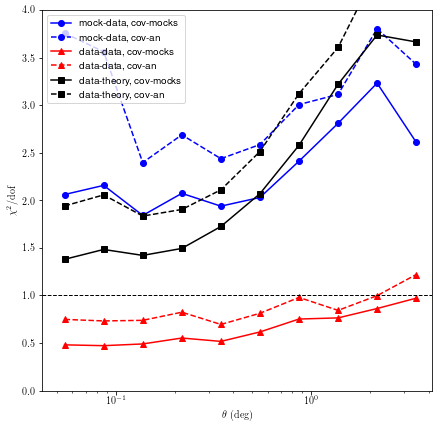

In [22]:
fig, ax = plt.subplots(figsize = (7,7))

chi_dmass_mocks_data_list = np.zeros(theta_sgc.size)
chi_dmass_mocks_data_an_list = np.zeros(theta_sgc.size)
chi_dmass_data_data_list = np.zeros(theta_sgc.size)
chi_dmass_data_data_an_list = np.zeros(theta_sgc.size)
chi_dmass_theory_data_list = np.zeros(theta_sgc.size)
chi_dmass_theory_data_an_list = np.zeros(theta_sgc.size)

for ind in range(0, 10):
    
    chi_dmass_mocks_data_list[ind] = chisquare(xi_mocks_sgc, xi_dmass, cov_rescaled_mocks, ind=ind)
    chi_dmass_mocks_data_an_list[ind] = chisquare(xi_mocks_sgc, xi_dmass, cov_an_dmass_NG, ind=ind)
    chi_dmass_data_data_list[ind] = chisquare(xi_sgc, xi_dmass, cov_mocks + cov_rescaled_mocks, ind=ind)
    chi_dmass_data_data_an_list[ind] = chisquare(xi_sgc, xi_dmass, cov_an_cmass_NG + cov_an_dmass_NG, ind=ind)
    chi_dmass_theory_data_list[ind] = chisquare(sis_sgc_interp, xi_dmass, cov_rescaled_mocks, ind=ind)
    chi_dmass_theory_data_an_list[ind] = chisquare(sis_sgc_interp, xi_dmass, cov_an_dmass_NG, ind=ind)
    print chi_dmass_data_data_an_list[ind]
    
ax.plot(theta_sgc, chi_dmass_mocks_data_list, 'bo-', label='mock-data, cov-mocks')
ax.plot(theta_sgc, chi_dmass_mocks_data_an_list, 'bo--', label='mock-data, cov-an')
ax.plot(theta_sgc, chi_dmass_data_data_list, 'r^-', label='data-data, cov-mocks')
ax.plot(theta_sgc, chi_dmass_data_data_an_list, 'r^--', label='data-data, cov-an')
ax.plot(theta_sgc, chi_dmass_theory_data_list, 'ks-', label='data-theory, cov-mocks')
ax.plot(theta_sgc, chi_dmass_theory_data_an_list, 'ks--', label='data-theory, cov-an')
ax.set_xscale('log')
ax.set_xlim(2.5/60, 250/60.)
ax.set_ylim(0, 4)
ax.axhline(y = 1.0, ls='--', color='k', lw=1)

ax.legend(loc='best')
ax.set_xlabel('$\\theta$ {\\rm (deg)}')
ax.set_ylabel(r'$\chi^2/{\rm dof}$')

### Mock ratio versus theory ratio

In [218]:
wratio = sis_sgc_interp**2 / xi_mocks_sgc**2
cratio = (cov_an_cmass_NG/cov_mocks).diagonal()

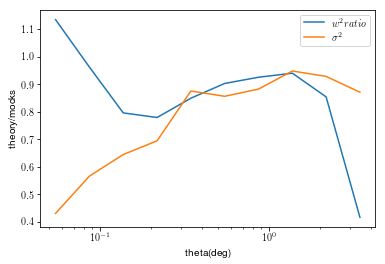

In [222]:
fig, ax = plt.subplots()
ax.plot( theta_sgc, wratio, label=r'$w^2 ratio$' )
ax.plot( theta_sgc, cratio, label = r'$\sigma^2$' )
ax.legend()

ax.set_xscale('log')
ax.set_ylabel('theory/mocks')
ax.set_xlabel('theta(deg)')

### Diagonal matrix tests

In [230]:
covdiff = cov_mocks - cov_an_cmass_NG
#covdiff = cov_mocks - cov_an_cmass_NG

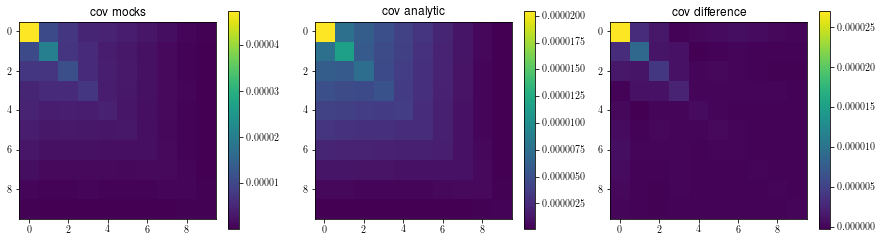

In [233]:
fig, (ax, ax2, ax3) = plt.subplots(1,3, figsize = (15,4))

im = ax.imshow(cov_mocks)
ax.set_title('cov mocks')
fig.colorbar(im, ax=ax)

im2 = ax2.imshow(cov_an_cmass_NG)
ax2.set_title('cov analytic')
fig.colorbar(im2, ax=ax2)

im3 = ax3.imshow(covdiff)
ax3.set_title('cov difference')
fig.colorbar(im3, ax=ax3)

In [237]:
covanalytic = cov_an_cmass_NG.copy()
np.fill_diagonal(covanalytic, np.zeros(10))

covdiff2 = covdiff.copy()
np.fill_diagonal(covdiff2, np.zeros(10))

/home/lee.5922/.local/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in divide


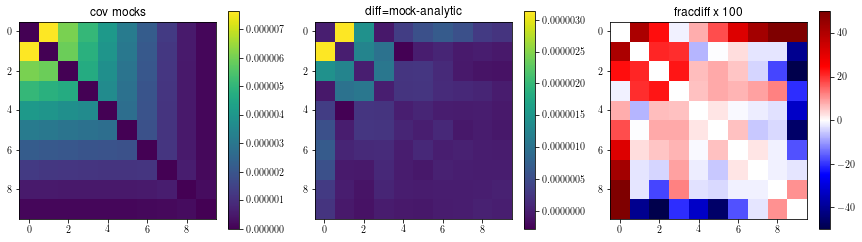

In [287]:
fig, (ax, ax2, ax3) = plt.subplots(1,3, figsize = (15,4))

#fig, ax = plt.subplots()

im = ax.imshow(covanalytic)
ax.set_title('cov mocks')
fig.colorbar(im, ax=ax)


#fig, ax = plt.subplots()

im2 = ax2.imshow(covdiff2)
ax2.set_title('diff=mock-analytic')
fig.colorbar(im2, ax=ax2)

#fig, ax = plt.subplots()

im3 = ax3.imshow(covdiff2/covanalytic * 100, cmap='seismic', vmin=-50, vmax = 50 )
ax3.set_title('fracdiff x 100')
fig.colorbar(im3, ax=ax3)